# Laptop Prices Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('laptop_prices.csv')

In [2]:
# Data Cleaning and Feature Engineering
bool_cols = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
for col in bool_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

df['TotalStorage'] = df['PrimaryStorage'] + df['SecondaryStorage']
df['CPU_Category'] = df['CPU_model'].str.extract(r'(i3|i5|i7|i9)', expand=False)
df['CPU_Category'].fillna('Other', inplace=True)

drop_cols = ['Product', 'Screen', 'ScreenW', 'ScreenH', 'CPU_model', 'GPU_model']
df.drop(columns=drop_cols, inplace=True)

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_46780\215619445.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CPU_Category'].fillna('Other', inplace=True)


,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,TotalStorage,CPU_Category
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,False,True,True,Intel,2.3,128,0,SSD,No,Intel,128,i5
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,False,False,False,Intel,1.8,128,0,Flash Storage,No,Intel,128,i5
2,HP,Notebook,15.6,8,No OS,1.86,575.00,False,False,False,Intel,2.5,256,0,SSD,No,Intel,256,i5
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,False,True,True,Intel,2.7,512,0,SSD,No,AMD,512,i7
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,False,True,True,Intel,3.1,256,0,SSD,No,Intel,256,i5


C:\Users\User\AppData\Local\Temp\ipykernel_46780\2371625141.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='CPU_Category', y='Price_euros', estimator=pd.Series.mean, ci=None)


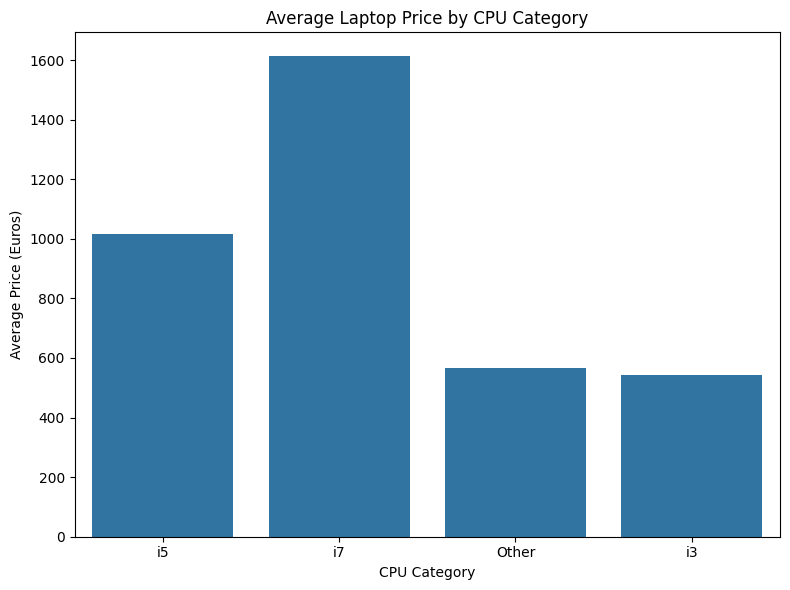

In [3]:
# Visualization: Average Price by CPU Category
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='CPU_Category', y='Price_euros', estimator=pd.Series.mean, ci=None)
plt.title('Average Laptop Price by CPU Category')
plt.ylabel('Average Price (Euros)')
plt.xlabel('CPU Category')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_46780\3120201220.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ram', y='Price_euros', estimator=pd.Series.mean, ci=None)


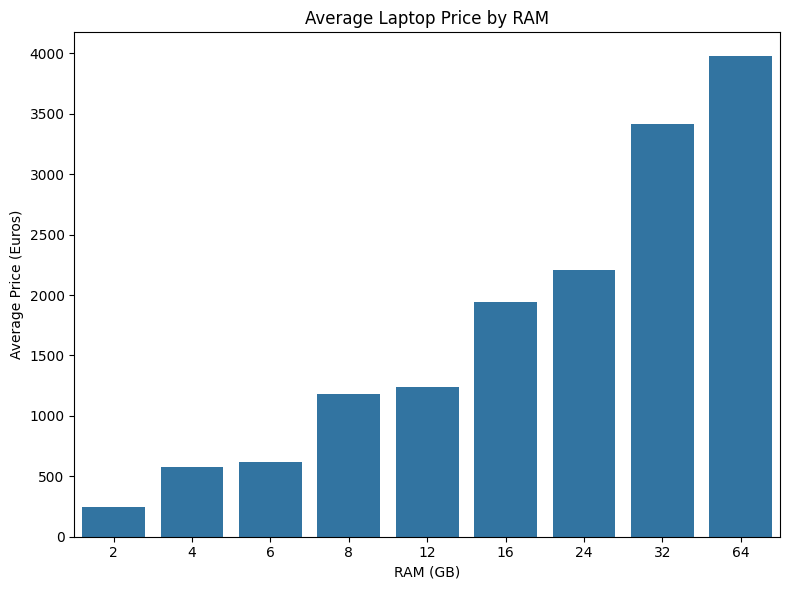

In [4]:
# Visualization: Average Price by RAM
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Ram', y='Price_euros', estimator=pd.Series.mean, ci=None)
plt.title('Average Laptop Price by RAM')
plt.ylabel('Average Price (Euros)')
plt.xlabel('RAM (GB)')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_46780\4223956307.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Touchscreen', y='Price_euros', estimator=pd.Series.mean, ci=None)


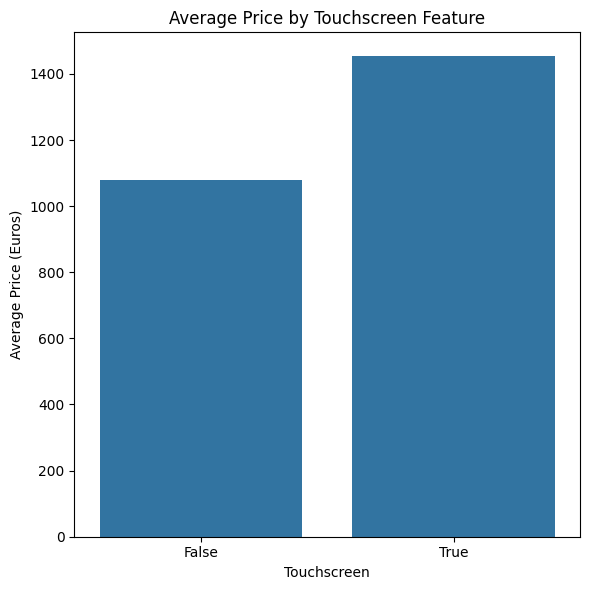

In [5]:
# Visualization: Average Price by Touchscreen Feature
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Touchscreen', y='Price_euros', estimator=pd.Series.mean, ci=None)
plt.title('Average Price by Touchscreen Feature')
plt.ylabel('Average Price (Euros)')
plt.xlabel('Touchscreen')
plt.tight_layout()
plt.show()

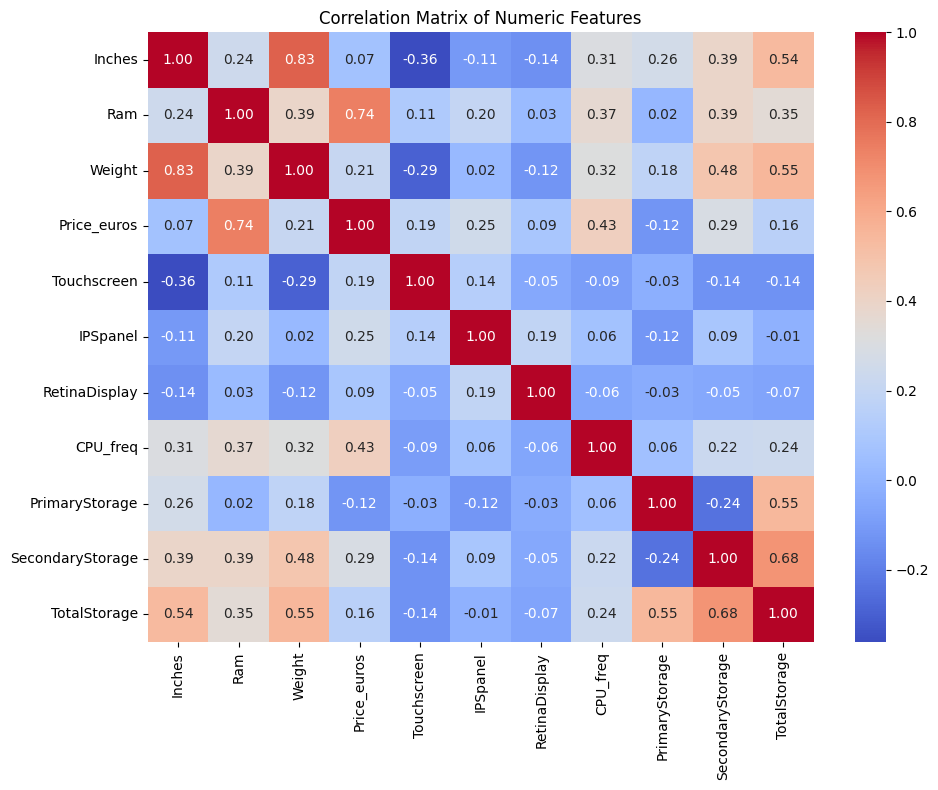

In [6]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['number', 'bool']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()